# Unit_2. Training.

# Первичный осмотр данных.

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('D:\Data Scientist_Skill Factory\Folders with data/Unit_2_Project/stud_math.csv')

In [227]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Функции.

In [335]:
def filtering(y):
    display(pd.DataFrame(y.value_counts()))
    print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
          , (y.value_counts()>10).sum())
    pd.DataFrame(y).info()

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:5])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# Первичный анализ данных в столбцах.

In [229]:
stud_math.columns# Выводим заголовки столбцов и оцениваем дальнейшее удобство использования.

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [230]:
# Во избежание путаницы делаем все буквы в заголовках маленькими:
stud_math.columns = stud_math.columns.str.lower()
# Переименовываем studytime, granular в studytime_granular:
stud_math.rename(columns = {'studytime, granular':'studytime_granular'},  inplace = True)
stud_math.columns# Выводим новые заголовки столбцов и оцениваем их удобство.

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [231]:
display(stud_math)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## Теперь рассмотрим все 30 (!) столбцов по отдельности. Но мы с вами не боимся рутинной работы, не так ли?

## shool (аббревиатура школы, в которой учится ученик)

In [232]:
# Попробуем отфильтровать лишние данные и выведем только те школы, у которых в таблице больше 10 учеников.
filtering(stud_math.school)

,school
GP,349
MS,46


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Итого у нас 2 уникальных значения. И обе школы выпустили больше 10-ти учеников.

## sex (пол ученика ('F' - женский, 'M' - мужской))

In [233]:
# Попробуем отфильтровать лишние данные и выведем только тот пол, к которому относятся больше 10 учеников(учениц).
filtering(stud_math.sex)

,sex
F,208
M,187


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Итого у нас 2 уникальных значения (чего и следовало ожидать). И учениц и учеников больше 10-ти.

## age (возраст ученика (от 15 до 22))

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

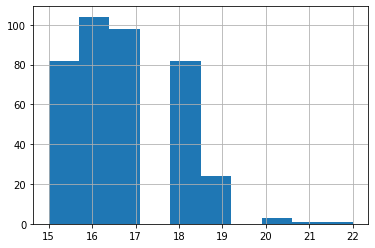

In [234]:
# Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:
stud_math.age.hist()
stud_math.age.describe()

Выбросов нет. Возраст основной массы учащихся - 15-19 лет, с максимальным количеством 16-17 летних. Есть незначительное количество учеников в возрасте 20 - 22 года (наверное это второгодники).

## address ( тип адреса ученика ('U' - городской, 'R' - за городом))

In [235]:
# Попробуем отфильтровать лишние данные и выведем только тот адрес, по которому живет больше 10 учеников из таблицы.
filtering(stud_math.address)

,address
U,295
R,83


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Итого у нас 2 уникальных значения. Как городских учеников, так и живущих за городом более 10-ти человек. У 17-ти учеников адрес не указан. Пропущенные значения заполнить не получится, так как данных нет.

In [236]:
stud_math.address.tolist()

['U',
 'U',
 'U',
 'U',
 'U',
 'U',
 nan,
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'U',
 'U',
 'U',
 'U',
 'R',
 'R',
 'R',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 nan,
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'R',
 'U',
 'U',
 'R',
 'U',
 'U',
 nan,
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 nan,
 'U',
 'U',
 'R',
 nan,
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'U',
 'U',
 'R',
 'U',
 'U',
 'R',
 'U',
 'U',
 'U',
 'R',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'R',
 'R',
 'U',
 'U',
 'U',
 'R',
 'U',
 'R',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'U',
 'U',
 'R',
 'R',
 'R',
 'R',
 nan,
 'R',
 'R',
 'U',
 'U',
 'R',
 'U',
 'U'

In [237]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.address = stud_math.address.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [238]:
stud_math.address.tolist()

['U',
 'U',
 'U',
 'U',
 'U',
 'U',
 None,
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'U',
 'U',
 'U',
 'U',
 'R',
 'R',
 'R',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 None,
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'R',
 'U',
 'U',
 'R',
 'U',
 'U',
 None,
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 None,
 'U',
 'U',
 'R',
 None,
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'U',
 'U',
 'R',
 'U',
 'U',
 'R',
 'U',
 'U',
 'U',
 'R',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'R',
 'R',
 'U',
 'U',
 'U',
 'R',
 'U',
 'R',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'U',
 'U',
 'R',
 'R',
 'R',
 'R',
 None,
 'R',
 'R',
 'U',
 'U',
 'R',
 'U'

## famsize (размер семьи('LE3' <= 3, 'GT3' >3)

In [239]:
# Попробуем отфильтровать лишние данные и выведем только те размеры семьи, которые имеет больше 10 учеников из таблицы.
filtering(stud_math.famsize)

,famsize
GT3,261
LE3,107


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Итого у нас 2 уникальных значения. Как учеников живущих в семьях по 3 человека и меньше, так и живущих в больших семьях более 10-ти человек. У 27-ти учеников адрес не указан. Пропущенные значения заполнить не получится, так как данных нет.

In [240]:
stud_math.famsize.tolist()

[nan,
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'LE3',
 nan,
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 nan,
 'LE3',
 'GT3',
 'GT3',
 nan,
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'LE3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 nan,
 'GT3',
 nan,
 nan,
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 nan,
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',


In [241]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.famsize = stud_math.famsize.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [242]:
stud_math.famsize.tolist()

[None,
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'LE3',
 None,
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 None,
 'LE3',
 'GT3',
 'GT3',
 None,
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'LE3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 None,
 'GT3',
 None,
 None,
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'LE3',
 'GT3',
 'GT3',
 'LE3',
 None,
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'GT3',
 'LE3',
 'GT3',
 'GT3',
 'GT3',


## pstatus (статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно))

In [243]:
# Попробуем отфильтровать лишние данные и выведем только те статусы родителей, которые имеет больше 10 учеников из таблицы.
filtering(stud_math.pstatus)

,pstatus
T,314
A,36


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Видно, что у подавляющего числа учеников (у 314) родители живут вместе. У заметного меньшинства (у 36) раздельно. По 45 ученикам у нас нет информации.

In [244]:
stud_math.pstatus.tolist()

['A',
 nan,
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'A',
 nan,
 'T',
 nan,
 'T',
 'T',
 'A',
 nan,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 nan,
 'T',
 'T',
 nan,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'A',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'T',
 nan,
 'A',
 'A',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 nan,
 'T',
 'T',
 'A',
 nan,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 nan,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 nan,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'A',
 'T',
 'T',
 nan,
 'T',
 'A',
 'T',
 nan,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'T',
 'T',
 'T',
 'T',
 nan,
 'T',
 'A',
 'T',
 'T',
 'T',
 'A',
 'T',
 nan,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 nan,
 'T',
 nan,
 'T',
 'T',
 'T',
 nan,
 'T',
 'T',
 'T',
 'T',
 nan,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T'

In [245]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.pstatus = stud_math.pstatus.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [246]:
stud_math.pstatus.tolist()

['A',
 None,
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'A',
 None,
 'T',
 None,
 'T',
 'T',
 'A',
 None,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 None,
 'T',
 'T',
 None,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'A',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'T',
 None,
 'A',
 'A',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 None,
 'T',
 'T',
 'A',
 None,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 None,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 None,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'A',
 'T',
 'T',
 None,
 'T',
 'A',
 'T',
 None,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'T',
 'T',
 'T',
 'T',
 None,
 'T',
 'A',
 'T',
 'T',
 'T',
 'A',
 'T',
 None,
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 'T',
 None,
 'T',
 None,
 'T',
 'T',
 'T',
 None,
 'T',
 'T',
 'T',
 'T',
 None,
 'T',
 'T',
 'T',
 'T',
 'T

## medu (образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее))

In [248]:
stud_math.medu.tolist()

[4.0,
 1.0,
 1.0,
 4.0,
 3.0,
 4.0,
 2.0,
 4.0,
 3.0,
 3.0,
 4.0,
 2.0,
 4.0,
 4.0,
 2.0,
 4.0,
 4.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 2.0,
 2.0,
 2.0,
 2.0,
 4.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0,
 3.0,
 2.0,
 4.0,
 4.0,
 3.0,
 2.0,
 2.0,
 4.0,
 4.0,
 2.0,
 2.0,
 4.0,
 3.0,
 4.0,
 4.0,
 4.0,
 2.0,
 4.0,
 4.0,
 4.0,
 3.0,
 2.0,
 4.0,
 4.0,
 1.0,
 4.0,
 4.0,
 1.0,
 1.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0,
 2.0,
 3.0,
 3.0,
 4.0,
 1.0,
 3.0,
 3.0,
 4.0,
 4.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 3.0,
 2.0,
 1.0,
 4.0,
 2.0,
 4.0,
 2.0,
 4.0,
 3.0,
 4.0,
 nan,
 4.0,
 2.0,
 1.0,
 4.0,
 2.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 4.0,
 4.0,
 4.0,
 3.0,
 2.0,
 4.0,
 2.0,
 4.0,
 4.0,
 3.0,
 1.0,
 3.0,
 1.0,
 2.0,
 2.0,
 4.0,
 2.0,
 3.0,
 3.0,
 0.0,
 2.0,
 4.0,
 3.0,
 1.0,
 2.0,
 3.0,
 3.0,
 4.0,
 3.0,
 3.0,
 1.0,
 4.0,
 4.0,
 2.0,
 4.0,
 1.0,
 2.0,
 1.0,
 3.0,
 1.0,
 4.0,
 2.0,
 1.0,
 2.0,
 3.0,
 3.0,
 4.0,
 2.0,
 1.0,
 1.0,
 2.0,
 3.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 3.0,
 2.0

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

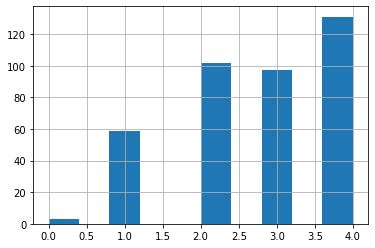

In [249]:
# Этот столбец числовой. Поэтому посмотрим на его распределение:
stud_math.medu.hist()
stud_math.medu.describe()

Выбросов нет. У большинства матерей учеников образование уровней 2 и 3 (5-9 классы и среднее специальное). Самая многочисленная, но не составляющая большинство группа матерей имеет образования уровня 4 (высшее). Заметная но малочисленная группа матерей имеет образование уровня 1 (1 - 4 класса). И самая малочисленная группа матерей имеет уровень 0 (без образования вообще). По трем матерям значения пустые и мы не имеем возможности их заполнить.

## fedu (образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее))

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

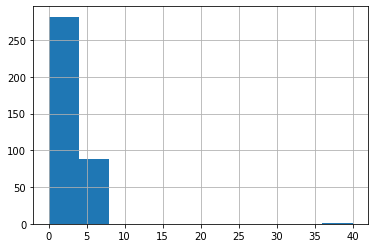

In [250]:
# Этот столбец числовой. Поэтому посмотрим на его распределение:
stud_math.fedu.hist()
stud_math.fedu.describe()

In [251]:
# Руководствуясь здравым смыслом, считаем все значения свыше 4 выбросами и убираем их.
stud_math = stud_math.loc[stud_math.fedu <= 4]

count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

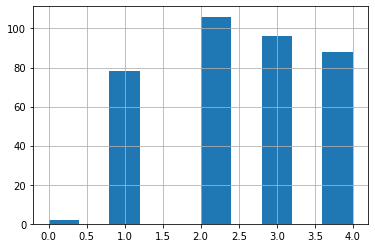

In [252]:
# Посмотрим на распределение признака теперь:
stud_math.fedu.hist()
stud_math.fedu.describe()

У большинства отцов учеников образование уровней 2 и 3 (5-9 классы и среднее специальное). Многочисленная группа отцов имеет образования уровня 4 (высшее). Также многочисленная группа отцов имеет образование уровня 1 (1 - 4 класса). И самая малочисленная группа отцов имеет уровень 0 (без образования вообще). По 24 отцам значения пустые и мы не имеем возможности их заполнить. Зачение по одному отцу отбраковано как выброс.

## mjob (работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое))

In [253]:
# Попробуем отфильтровать лишние данные и выведем только те занятия, которыми занято больше 10 мам учеников из таблицы.
filtering(stud_math.mjob)

,mjob
other,125
services,90
at_home,57
teacher,48
health,31


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    351 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итого у нас 5 уникальных значений. Каждое из них встречается в столбце более 10-ти раз. Возможности заполнить пробелы у нас нет, так как нет данных.

In [254]:
stud_math.mjob.tolist()

['at_home',
 'at_home',
 'at_home',
 'health',
 'other',
 'services',
 'other',
 'other',
 'services',
 'other',
 'teacher',
 'health',
 'teacher',
 'other',
 'health',
 'services',
 'other',
 'services',
 'health',
 'teacher',
 'teacher',
 'other',
 'services',
 'services',
 'other',
 'health',
 'services',
 nan,
 'health',
 'services',
 'teacher',
 'other',
 'other',
 'other',
 'teacher',
 'other',
 'services',
 'at_home',
 'other',
 'teacher',
 'services',
 'other',
 'other',
 'health',
 'teacher',
 'services',
 'services',
 'health',
 'health',
 'services',
 nan,
 'other',
 'services',
 nan,
 'health',
 'services',
 'other',
 'teacher',
 'services',
 'teacher',
 'other',
 'health',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'teacher',
 'teacher',
 'other',
 'other',
 'at_home',
 'other',
 'other',
 'services',
 'services',
 'other',
 'services',
 'at_home',
 'other',
 nan,
 'teacher',
 'other',
 'services',
 'other',
 'teacher',
 'services',
 'at_home',
 'services

In [255]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.mjob = stud_math.mjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [256]:
stud_math.mjob.tolist()

['at_home',
 'at_home',
 'at_home',
 'health',
 'other',
 'services',
 'other',
 'other',
 'services',
 'other',
 'teacher',
 'health',
 'teacher',
 'other',
 'health',
 'services',
 'other',
 'services',
 'health',
 'teacher',
 'teacher',
 'other',
 'services',
 'services',
 'other',
 'health',
 'services',
 None,
 'health',
 'services',
 'teacher',
 'other',
 'other',
 'other',
 'teacher',
 'other',
 'services',
 'at_home',
 'other',
 'teacher',
 'services',
 'other',
 'other',
 'health',
 'teacher',
 'services',
 'services',
 'health',
 'health',
 'services',
 None,
 'other',
 'services',
 None,
 'health',
 'services',
 'other',
 'teacher',
 'services',
 'teacher',
 'other',
 'health',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'teacher',
 'teacher',
 'other',
 'other',
 'at_home',
 'other',
 'other',
 'services',
 'services',
 'other',
 'services',
 'at_home',
 'other',
 None,
 'teacher',
 'other',
 'services',
 'other',
 'teacher',
 'services',
 'at_home',
 'serv

## fjob (работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое))

In [257]:
# Попробуем отфильтровать лишние данные и выведем только те занятия, которыми занято больше 10 отцов учеников из таблицы.
filtering(stud_math.fjob)

,fjob
other,189
services,94
teacher,26
at_home,14
health,13


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    336 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итого у нас 5 уникальных значений. Каждое из них встречается в столбце более 10-ти раз. Возможности заполнить пробелы у нас нет, так как нет данных.

In [53]:
stud_math.fjob.tolist()

['teacher',
 'other',
 'other',
 nan,
 'other',
 'other',
 'other',
 'teacher',
 'other',
 'other',
 'health',
 'services',
 'other',
 'other',
 'other',
 'services',
 nan,
 'services',
 'other',
 'other',
 nan,
 'other',
 'health',
 'services',
 nan,
 'services',
 'other',
 'teacher',
 'services',
 nan,
 'at_home',
 'other',
 'other',
 'other',
 'services',
 'teacher',
 'health',
 'other',
 'other',
 'other',
 'services',
 nan,
 'other',
 nan,
 'other',
 'teacher',
 'services',
 'other',
 nan,
 'services',
 'other',
 'other',
 'services',
 nan,
 'teacher',
 'services',
 'services',
 'health',
 'services',
 'services',
 'services',
 nan,
 'other',
 'other',
 'other',
 'other',
 'other',
 'services',
 'other',
 'other',
 'other',
 'other',
 'other',
 'services',
 'other',
 'other',
 'services',
 'other',
 'services',
 'other',
 'other',
 'other',
 'health',
 'other',
 'other',
 'other',
 'services',
 'health',
 'other',
 'other',
 'other',
 'other',
 'at_home',
 'services',
 'teacher',


In [56]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.fjob = stud_math.fjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [57]:
stud_math.fjob.tolist()

['teacher',
 'other',
 'other',
 None,
 'other',
 'other',
 'other',
 'teacher',
 'other',
 'other',
 'health',
 'services',
 'other',
 'other',
 'other',
 'services',
 None,
 'services',
 'other',
 'other',
 None,
 'other',
 'health',
 'services',
 None,
 'services',
 'other',
 'teacher',
 'services',
 None,
 'at_home',
 'other',
 'other',
 'other',
 'services',
 'teacher',
 'health',
 'other',
 'other',
 'other',
 'services',
 None,
 'other',
 None,
 'other',
 'teacher',
 'services',
 'other',
 None,
 'services',
 'other',
 'other',
 'services',
 None,
 'teacher',
 'services',
 'services',
 'health',
 'services',
 'services',
 'services',
 None,
 'other',
 'other',
 'other',
 'other',
 'other',
 'services',
 'other',
 'other',
 'other',
 'other',
 'other',
 'services',
 'other',
 'other',
 'services',
 'other',
 'services',
 'other',
 'other',
 'other',
 'health',
 'other',
 'other',
 'other',
 'services',
 'health',
 'other',
 'other',
 'other',
 'other',
 'at_home',
 'services',
 '

## reason ( причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое))

In [258]:
# Попробуем отфильтровать лишние данные и выведем только те причины, по которыми школу выбрало больше 10 учеников из таблицы.
filtering(stud_math.reason)

,reason
course,128
reputation,98
home,96
other,32


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  354 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итого у нас 4 уникальных значения. Каждое из них встречается в столбце более 10-ти раз. Возможности заполнить пробелы у нас нет, так как нет данных.

In [259]:
stud_math.reason.tolist()

['course',
 'course',
 'other',
 'home',
 'home',
 'reputation',
 'home',
 'home',
 'home',
 'home',
 'reputation',
 'course',
 'course',
 'home',
 'home',
 'reputation',
 'reputation',
 'course',
 'home',
 'reputation',
 'course',
 'reputation',
 'course',
 'home',
 'home',
 'other',
 'home',
 'home',
 'home',
 'reputation',
 'course',
 nan,
 'home',
 'other',
 'home',
 'reputation',
 'course',
 'reputation',
 'home',
 'home',
 'course',
 'course',
 'course',
 'reputation',
 'home',
 'other',
 'course',
 'other',
 'other',
 'course',
 'other',
 'other',
 'reputation',
 'course',
 'other',
 'course',
 'reputation',
 nan,
 'reputation',
 'course',
 'reputation',
 'reputation',
 'reputation',
 'reputation',
 'course',
 'reputation',
 nan,
 'home',
 'home',
 'course',
 nan,
 'home',
 'course',
 'course',
 'home',
 'reputation',
 'home',
 'home',
 'reputation',
 'course',
 'reputation',
 'reputation',
 'reputation',
 'home',
 'reputation',
 'home',
 'home',
 'reputation',
 'home',
 'reputa

In [260]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.reason = stud_math.reason.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [261]:
stud_math.reason.tolist()

['course',
 'course',
 'other',
 'home',
 'home',
 'reputation',
 'home',
 'home',
 'home',
 'home',
 'reputation',
 'course',
 'course',
 'home',
 'home',
 'reputation',
 'reputation',
 'course',
 'home',
 'reputation',
 'course',
 'reputation',
 'course',
 'home',
 'home',
 'other',
 'home',
 'home',
 'home',
 'reputation',
 'course',
 None,
 'home',
 'other',
 'home',
 'reputation',
 'course',
 'reputation',
 'home',
 'home',
 'course',
 'course',
 'course',
 'reputation',
 'home',
 'other',
 'course',
 'other',
 'other',
 'course',
 'other',
 'other',
 'reputation',
 'course',
 'other',
 'course',
 'reputation',
 None,
 'reputation',
 'course',
 'reputation',
 'reputation',
 'reputation',
 'reputation',
 'course',
 'reputation',
 None,
 'home',
 'home',
 'course',
 None,
 'home',
 'course',
 'course',
 'home',
 'reputation',
 'home',
 'home',
 'reputation',
 'course',
 'reputation',
 'reputation',
 'reputation',
 'home',
 'reputation',
 'home',
 'home',
 'reputation',
 'home',
 're

## guardian (опекун ('mother' - мать, 'father' - отец, 'other' - другое))

In [262]:
# Попробуем отфильтровать лишние данные и выведем только тех опекунов, которых имеет больше 10 учеников из таблицы.
filtering(stud_math.guardian)

,guardian
mother,236
father,78
other,26


Значений, встретившихся в столбце более 10 раз: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  340 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итого у нас 3 уникальных значения. Каждое из них встречается в столбце более 10-ти раз. Возможности заполнить пробелы у нас нет, так как нет данных.

In [263]:
stud_math.guardian.tolist()

['mother',
 'father',
 'mother',
 'mother',
 'father',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'father',
 'mother',
 'other',
 'mother',
 'mother',
 'mother',
 'mother',
 'father',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'father',
 'mother',
 'mother',
 nan,
 'mother',
 'mother',
 nan,
 'father',
 'father',
 'mother',
 'mother',
 'mother',
 nan,
 'mother',
 'mother',
 'father',
 nan,
 'mother',
 'mother',
 'mother',
 'mother',
 nan,
 'father',
 'father',
 'mother',
 'father',
 'mother',
 'mother',
 'mother',
 'father',
 'father',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'father',
 nan,
 'mother',
 'mother',
 'father',
 'father',
 'mother',
 'mother',
 'father',
 'mother',
 nan,
 'mother',
 'father',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 nan,
 'mother',
 'mother',
 'fathe

In [264]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.guardian = stud_math.guardian.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [265]:
stud_math.guardian.tolist()

['mother',
 'father',
 'mother',
 'mother',
 'father',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'father',
 'mother',
 'other',
 'mother',
 'mother',
 'mother',
 'mother',
 'father',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'father',
 'mother',
 'mother',
 None,
 'mother',
 'mother',
 None,
 'father',
 'father',
 'mother',
 'mother',
 'mother',
 None,
 'mother',
 'mother',
 'father',
 None,
 'mother',
 'mother',
 'mother',
 'mother',
 None,
 'father',
 'father',
 'mother',
 'father',
 'mother',
 'mother',
 'mother',
 'father',
 'father',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 'father',
 None,
 'mother',
 'mother',
 'father',
 'father',
 'mother',
 'mother',
 'father',
 'mother',
 None,
 'mother',
 'father',
 'mother',
 'mother',
 'mother',
 'mother',
 'mother',
 None,
 'mother',
 'mother',

## traveltime (время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.))

count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

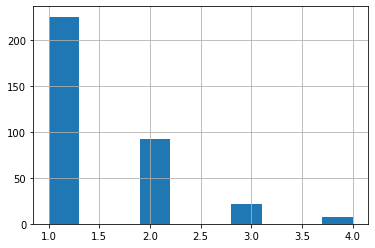

In [267]:
# # Этот столбец числовой. Посмотрим на его распределение:
stud_math.traveltime.hist()
stud_math.traveltime.describe()

Выбросов нет. Видно что большинство учеников тратит на дорогу до школы не более 15 минут.

## studytime (время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов))

count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

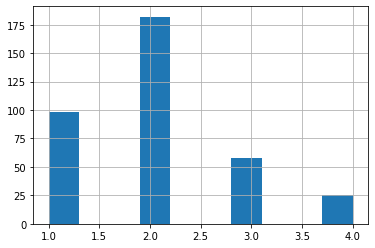

In [268]:
# Этот столбец числовой. Посмотрим на его распределение:
stud_math.studytime.hist()
stud_math.studytime.describe()

Выбросов нет. Видно что около половины учеников тратит на учебу вне школы 2-5 часов в неделю.

##  failures (количество внеучебных неудач (n, если 1<=n<=3, иначе 0))

count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

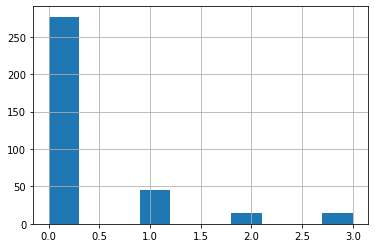

In [269]:
# Этот столбец числовой. Посмотрим на его распределение:
stud_math.failures.hist()
stud_math.failures.describe()

In [ ]:
Выбросов нет. Видно что у большинства учеников не было внеучебных неудач.

## schoolsup (дополнительная образовательная поддержка (yes или no))

In [270]:
# Попробуем отфильтровать лишние данные и выведем только те ответы, которые верны более чем для 10 учеников из таблицы.
filtering(stud_math.schoolsup)

,schoolsup
no,314
yes,47


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  361 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итого у нас 2 уникальных значения. Каждое из них встречается в столбце более 10-ти раз. Возможности заполнить пробелы у нас нет, так как нет данных.

In [271]:
stud_math.schoolsup.tolist()

['yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 nan,
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 nan,
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 nan,
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 

In [272]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.schoolsup = stud_math.schoolsup.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [273]:
stud_math.schoolsup.tolist()

['yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 None,
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 None,
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 None,
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no'

## famsup (семейная образовательная поддержка (yes или no))

In [274]:
# Попробуем отфильтровать лишние данные и выведем только те ответы, которые верны более чем для 10 учеников из таблицы.
filtering(stud_math.famsup)

,famsup
yes,204
no,131


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  335 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итого у нас 2 уникальных значения. Каждое из них встречается в столбце более 10-ти раз. Возможности заполнить пробелы у нас нет, так как нет данных.

In [275]:
stud_math.famsup.tolist()

['no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'no',
 'no',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 nan,
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 nan,
 nan,
 'yes',
 'no',
 'no',
 'yes',
 nan,
 'yes',
 nan,
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 nan,
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 nan,
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',

In [280]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.famsup = stud_math.famsup.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [281]:
stud_math.famsup.tolist()

['no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'no',
 'no',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 None,
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 None,
 None,
 'yes',
 'no',
 'no',
 'yes',
 None,
 'yes',
 None,
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 None,
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 None,
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 

## paid (дополнительные платные занятия по математике (yes или no))

In [282]:
# Попробуем отфильтровать лишние данные и выведем только те ответы, которые верны более чем для 10 учеников из таблицы.
filtering(stud_math.paid)

,paid
no,188
yes,145


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    333 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итого у нас 2 уникальных значения. Каждое из них встречается в столбце более 10-ти раз. Возможности заполнить пробелы у нас нет, так как нет данных.

In [283]:
stud_math.paid.tolist()

['no',
 'no',
 nan,
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 nan,
 nan,
 'no',
 'no',
 'no',
 'yes',
 'yes',
 nan,
 'yes',
 'no',
 'yes',
 'yes',
 nan,
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 nan,
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 nan,
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 nan,
 nan,
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 nan,
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 nan,
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 nan,
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no

In [284]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.paid = stud_math.paid.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [285]:
stud_math.paid.tolist()

['no',
 'no',
 None,
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 None,
 None,
 'no',
 'no',
 'no',
 'yes',
 'yes',
 None,
 'yes',
 'no',
 'yes',
 'yes',
 None,
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 None,
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 None,
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 None,
 None,
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 None,
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 None,
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 None,
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',


## activities (дополнительные внеучебные занятия (yes или no))

In [286]:
# Попробуем отфильтровать лишние данные и выведем только те ответы, которые верны более чем для 10 учеников из таблицы.
filtering(stud_math.activities)

,activities
yes,180
no,176


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  356 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итого у нас 2 уникальных значения. Каждое из них встречается в столбце более 10-ти раз. Возможности заполнить пробелы у нас нет, так как нет данных.

In [289]:
stud_math.activities.tolist()

['no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 None,
 None,
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 None,
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 None,
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 None,
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 Non

In [287]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.activities = stud_math.activities.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [288]:
stud_math.activities.tolist()

['no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 None,
 None,
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 None,
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 None,
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 None,
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 Non

## nursery — посещал детский сад (yes или no)

In [290]:
# Попробуем отфильтровать лишние данные и выведем только те ответы, которые верны более чем для 10 учеников из таблицы.
filtering(stud_math.nursery)

,nursery
yes,279
no,75


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  354 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итого у нас 2 уникальных значения. Каждое из них встречается в столбце более 10-ти раз. Возможности заполнить пробелы у нас нет, так как нет данных.

In [291]:
stud_math.nursery.tolist()

['yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 nan,
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 nan,
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes

In [294]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.nursery = stud_math.nursery.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [295]:
stud_math.nursery.tolist()

['yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 None,
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 None,
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 

## studytime_granular (к сожалению не пояснен смысл этого параметра)

count    313.000000
mean      -6.115016
std        2.573197
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

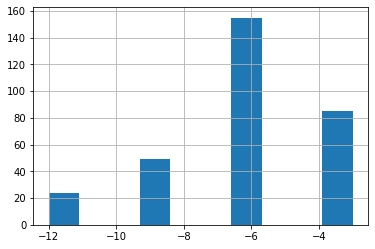

In [338]:
# Этот столбец числовой. Посмотрим на его распределение:
stud_math.studytime_granular.hist()
stud_math.studytime_granular.describe()

In [ ]:
Выбросов нет.

## higher (хочет получить высшее образование (yes или no))

In [296]:
# Попробуем отфильтровать лишние данные и выведем только те ответы, которые верны более чем для 10 учеников из таблицы.
filtering(stud_math.higher)

,higher
yes,333
no,19


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  352 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итого у нас 2 уникальных значения. Каждое из них встречается в столбце более 10-ти раз. Возможности заполнить пробелы у нас нет, так как нет данных.

In [297]:
stud_math.higher.tolist()

['yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'ye

In [300]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.higher = stud_math.higher.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [301]:
stud_math.higher.tolist()

['yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',

 ## internet (наличие интернета дома (yes или no))

In [302]:
# Попробуем отфильтровать лишние данные и выведем только те ответы, которые верны более чем для 10 учеников из таблицы.
filtering(stud_math.internet)

,internet
yes,283
no,54


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  337 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итого у нас 2 уникальных значения. Каждое из них встречается в столбце более 10-ти раз. Возможности заполнить пробелы у нас нет, так как нет данных.

In [303]:
stud_math.internet.tolist()

[nan,
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'no',
 nan,
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 nan,
 nan,
 'no',
 'yes',
 'no',
 'no

In [304]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.internet = stud_math.internet.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [305]:
stud_math.internet.tolist()

[None,
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'no',
 None,
 None,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 None,
 None,
 'no',
 'yes

## romantic (в романтических отношениях (yes или no))

In [306]:
# Попробуем отфильтровать лишние данные и выведем только те ответы, которые верны более чем для 10 учеников из таблицы.
filtering(stud_math.romantic)

,romantic
no,226
yes,116


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  342 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


Итого у нас 2 уникальных значения. Каждое из них встречается в столбце более 10-ти раз. Возможности заполнить пробелы у нас нет, так как нет данных.

In [307]:
stud_math.romantic.tolist()

['no',
 'no',
 nan,
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 nan,
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 nan,
 nan,
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 nan,
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 nan,
 'no',
 'no',
 nan,
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 nan,
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 nan,
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 nan,
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 nan,
 'yes',


In [310]:
#Мы видим, что есть строки со значением nan, надо заменить их на None для удобства.
stud_math.romantic = stud_math.romantic.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [311]:
stud_math.romantic.tolist()

['no',
 'no',
 None,
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 None,
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 None,
 None,
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 None,
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 None,
 'no',
 'no',
 None,
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 None,
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 None,
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 None,
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 Non

## famrel (семейные отношения (от 1 - очень плохо до 5 - очень хорошо))

count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

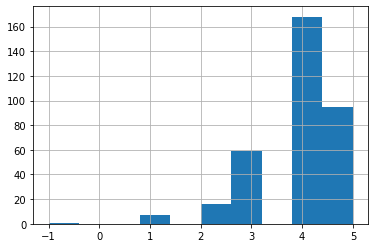

In [312]:
# Этот столбец числовой. Посмотрим на его распределение:
stud_math.famrel.hist()
stud_math.famrel.describe()

In [313]:
# Руководствуясь здравым смыслом, считаем все значения меньше 1 выбросами и убираем их.
stud_math = stud_math.loc[stud_math.famrel >= 1]

count    345.000000
mean       3.950725
std        0.902455
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

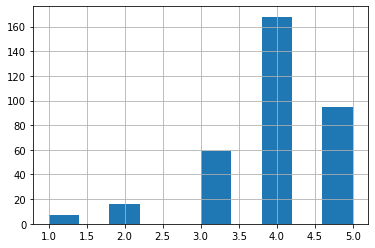

In [314]:
# Посмотрим на его распределение теперь:
stud_math.famrel.hist()
stud_math.famrel.describe()

Видно, что подавляющее большинство учеников имеет хорошие и очень хорошие отношения с родителями.

##  freetime (свободное время после школы (от 1 - очень мало до 5 - очень мого))

count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

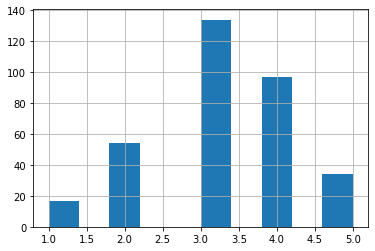

In [315]:
# Этот столбец числовой. Посмотрим на его распределение:
stud_math.freetime.hist()
stud_math.freetime.describe()

Выбросов нет. Большинство в середине. Очень мало и очень много свободного времени после школы имеет малая часть учеников.

## goout (проведение времени с друзьями (от 1 - очень мало до 5 - очень много))

count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

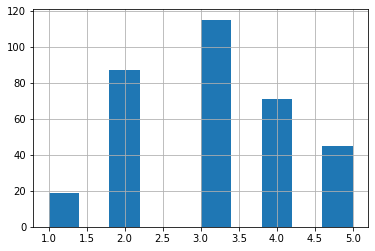

In [316]:
# Этот столбец числовой. Посмотрим на его распределение:
stud_math.goout.hist()
stud_math.goout.describe()

Выбросов нет. Большинство в середине. Очень мало и очень много времени с друзьями проводит малая часть учеников.

## health (текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо))

count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

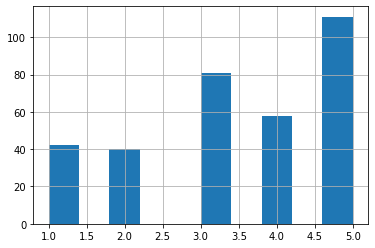

In [317]:
# Этот столбец числовой. Посмотрим на его распределение:
stud_math.health.hist()
stud_math.health.describe()

Выбросов нет. Распределены равномерно. Многочисленнее остальных группа учащихся с очень хорошим здоровьем.

## absences (количество пропущенных занятий)

count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

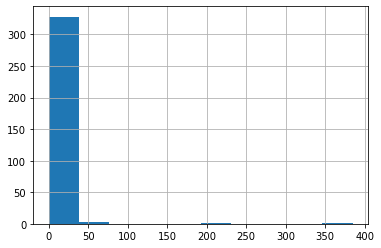

In [318]:
# Этот столбец числовой. Посмотрим на его распределение:
stud_math.absences.hist()
stud_math.absences.describe()

Вряд ли кто то пропустил более 300 занятий. Наверное в данных есть выбросы.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


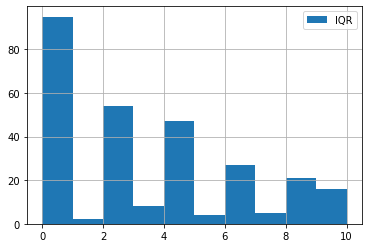

In [319]:
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [321]:
#Этот способ позволил нам отобрать экстремально низкие и экстремально высокие оценки. Отфильтруем данные:
stud_math = stud_math.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

count    318.000000
mean       4.522013
std        4.840466
min        0.000000
25%        0.000000
50%        3.500000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

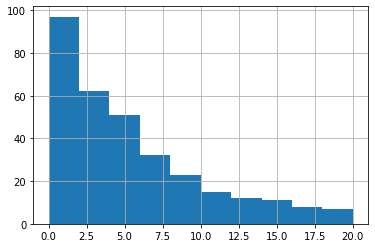

In [323]:
# Посмотрим на его распределение без выбросов:
stud_math.absences.hist()
stud_math.absences.describe()

Видно, что с ростом числа пропущенных занятий число учеников стремительно снижается.

## score (баллы по госэкзамену по математике)

count    313.000000
mean      52.124601
std       22.511546
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

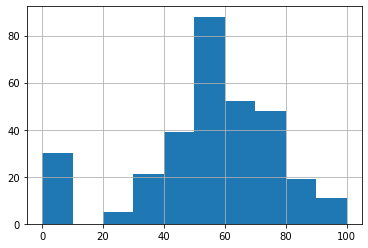

In [324]:
# Этот столбец числовой. Посмотрим на его распределение:
stud_math.score.hist()
stud_math.score.describe()

In [ ]:
Видно, что значения распределены от нуля до ста. Значит использовалась стобальная шкала оценок. Выбросов нет.

# Корреляционный анализ.

In [326]:
# Используем матрицу корреляций:
stud_math.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.176250,-0.193469,0.073914,-0.015188,0.219710,0.015188,0.058482,0.045144,0.097906,-0.061147,0.138921,-0.152937
medu,-0.176250,1.000000,0.647425,-0.188525,0.096564,-0.242613,-0.096564,-0.034579,0.006825,0.056204,-0.079287,0.102861,0.198240
fedu,-0.193469,0.647425,1.000000,-0.193201,0.003729,-0.281114,-0.003729,-0.040042,-0.018485,0.011471,0.007139,-0.009144,0.114211
traveltime,0.073914,-0.188525,-0.193201,1.000000,-0.109333,0.083311,0.109333,-0.051752,0.009835,0.004574,-0.011856,-0.053176,-0.067642
studytime,-0.015188,0.096564,0.003729,-0.109333,1.000000,-0.143829,-1.000000,0.018273,-0.141048,-0.048134,-0.102211,-0.069378,0.119395
failures,0.219710,-0.242613,-0.281114,0.083311,-0.143829,1.000000,0.143829,0.031704,0.117818,0.084852,0.067415,0.059202,-0.311995
studytime_granular,0.015188,-0.096564,-0.003729,0.109333,-1.000000,0.143829,1.000000,-0.018273,0.141048,0.048134,0.102211,0.069378,-0.119395
famrel,0.058482,-0.034579,-0.040042,-0.051752,0.018273,0.031704,-0.018273,1.000000,0.169739,0.092249,0.096186,-0.061762,0.045598
freetime,0.045144,0.006825,-0.018485,0.009835,-0.141048,0.117818,0.141048,0.169739,1.000000,0.283708,0.074485,0.100271,0.042375
goout,0.097906,0.056204,0.011471,0.004574,-0.048134,0.084852,0.048134,0.092249,0.283708,1.000000,-0.008117,0.061950,-0.127803


    Из матрицы корреляций можно сделать некоторые выводы. Для начала условимся считать, что если коэфициэнт корреляции больше 0.1 (или меньше -0.1 для обратной корреляции) то параметр оказывает заметное влияние на итоговый балл на госэкзамене и мы берем этот параметр в модель. Во всех остальных случаях влияние параметра будем считать незначительным и в модель его брать не будем.
    В итоге получаем следующее.
    Значительное влияние на  итоговый балл оказывают следующие параметры, имеющие прямую корреляцию с ним (в порядке убывания   значимости):
        - medu (образование матери). 
        - fedu (образование отца).
        - studytime (время на учёбу помимо школы в неделю).
        - absences (количество пропущенных занятий).
    Значительное влияние на  итоговый балл оказывают следующие параметры, имеющие обратную корреляцию (в порядке убывания зачимости):
        - failures (количество внеучебных неудач)
        - age (возраст ученика)
        - goout (проведение времени с друзьями)
        - studytime_granular (этот параметр можно исключить, так как он имеет коэфициэнт корреляции -1 с параметром studytime).
     Не оказывают существенного влияния на итоговый балл следующие параметры:
        - health (текущее состояние здоровья)
        - freetime (свободное время после школы)
        - famrel (семейные отношения)
        - traveltime (время в пути до школы)

# Анализ номинативных переменных.

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: school, sex, address, famsize, pstatus, mjob, fjob, reason, guardian, schoolsup, famsup, activities, nursery, higher, internet, romantic.

Так как уникальных значений в столбцах мало, будем брать в рассмотрение максимальное их значение - 5.

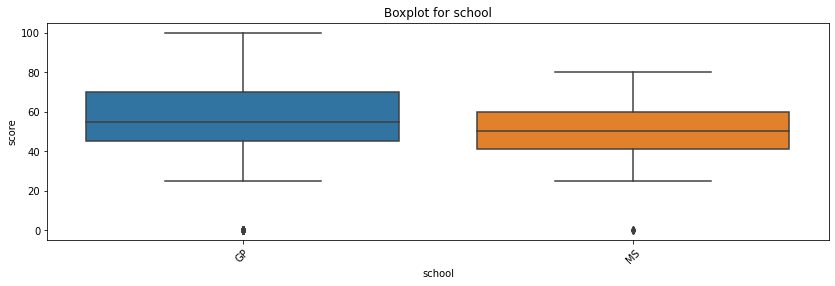

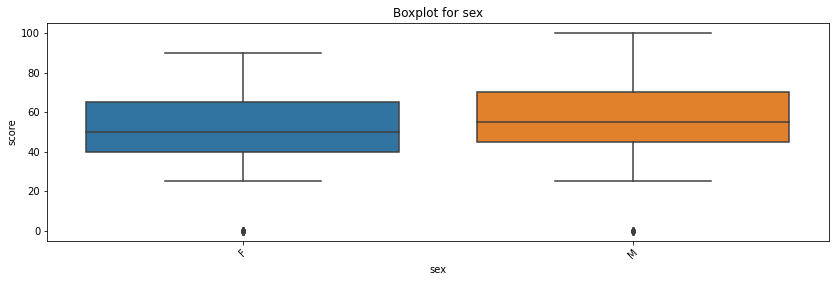

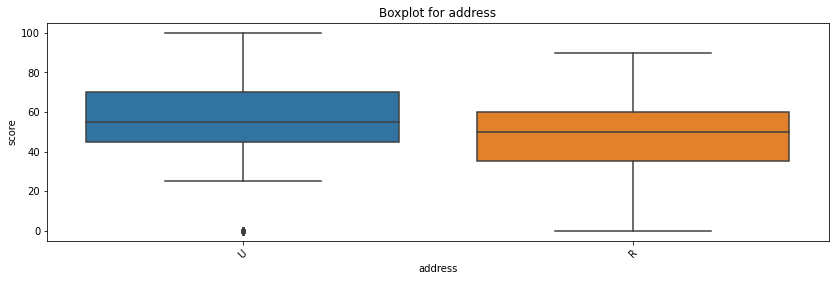

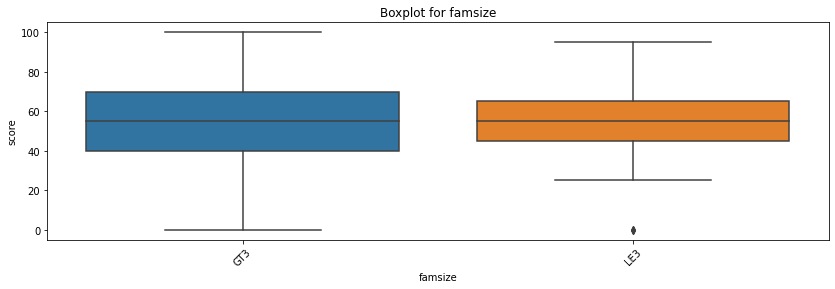

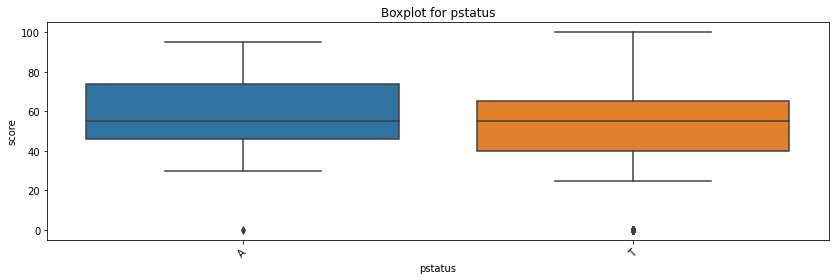

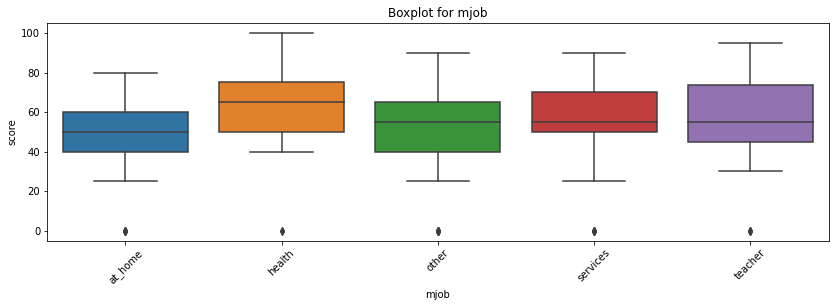

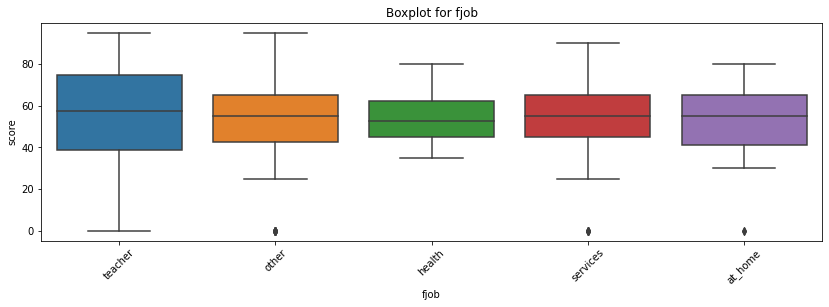

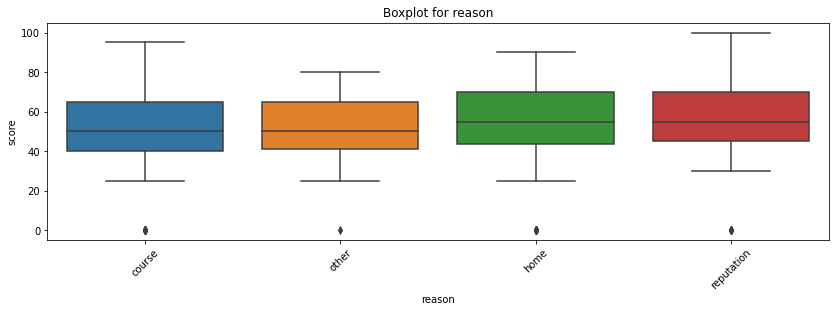

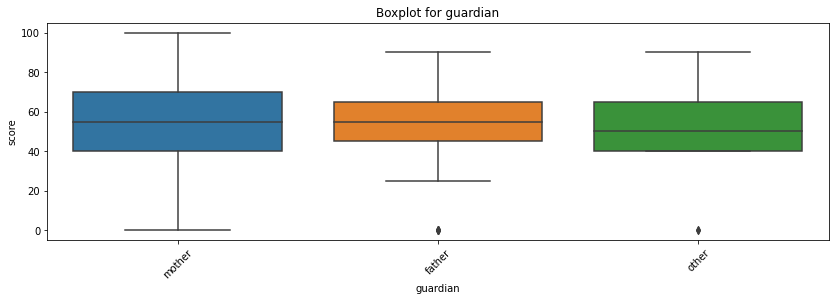

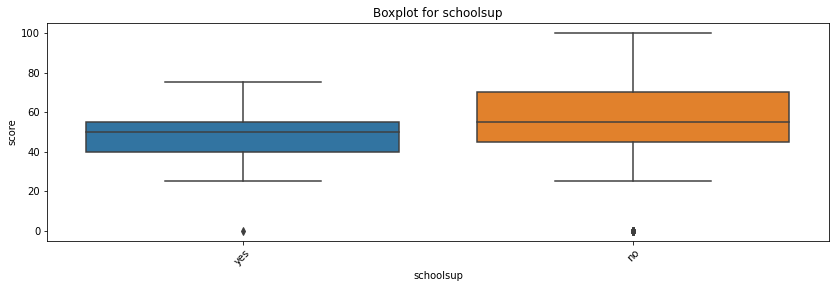

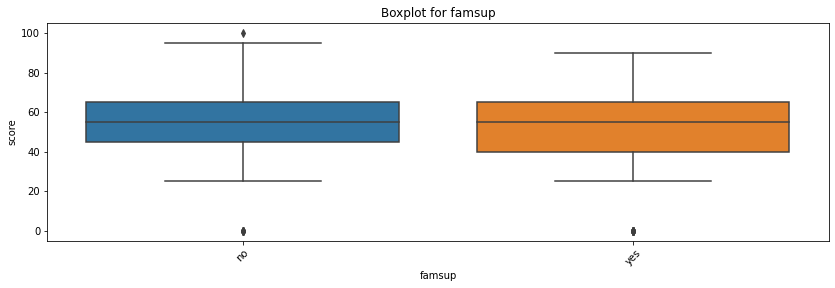

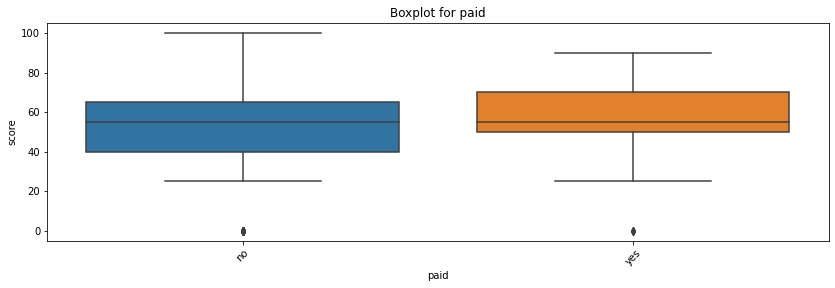

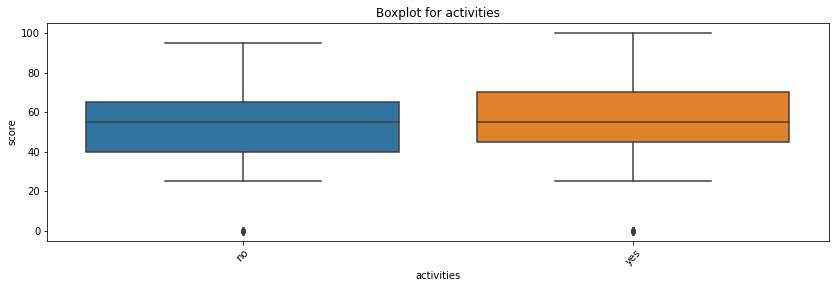

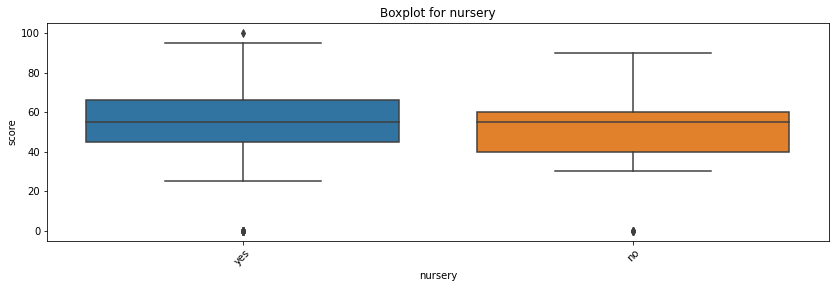

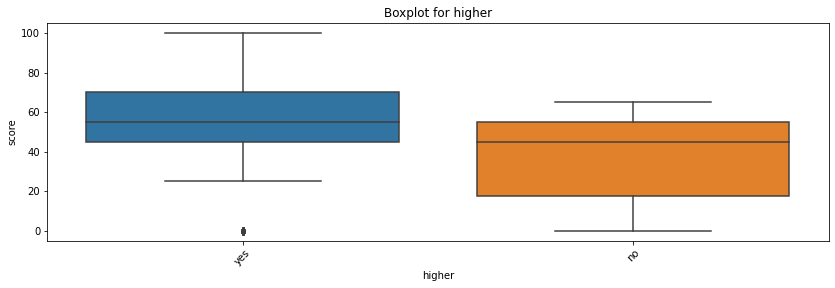

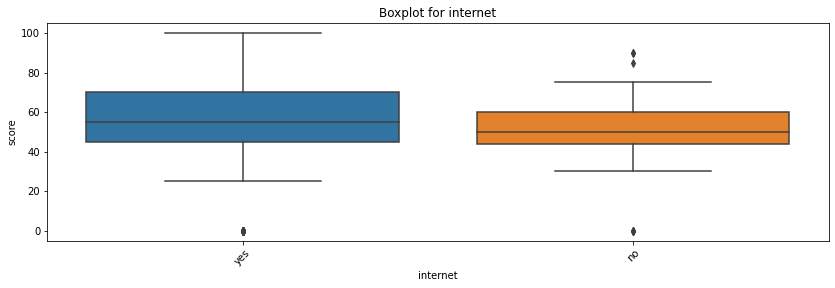

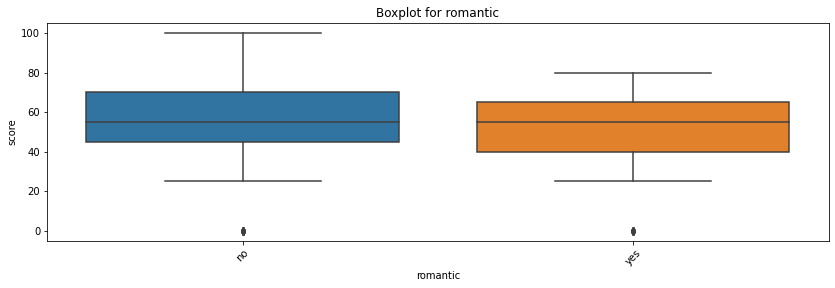

In [341]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

По графикам похоже, что все параметры не оказывают сильного влияния на оценку батончика. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [342]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Как мы видим, серъезных статистических различий в распределении оценок не выявлено ни для одного номинативного признака.

# Выводы.

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: failures, age, goout, medu, fedu, studytime, absences.

In [339]:
stud_math_for_model = stud_math.loc[:, ['failures', 'age', 'goout', 'medu', 'fedu', 'studytime', 'absences']]
stud_math_for_model.head()

,failures,age,goout,medu,fedu,studytime,absences
0,0.0,18,4.0,4.0,4.0,2.0,6.0
1,0.0,17,3.0,1.0,1.0,2.0,4.0
2,3.0,15,2.0,1.0,1.0,2.0,10.0
3,0.0,15,2.0,4.0,2.0,3.0,2.0
4,0.0,16,2.0,3.0,3.0,2.0,4.0


Настало время подвести выводы.

Итак, в результате EDA для анализа влияния параметров жизни учеников на итоговый балл на госэкзамене по математике были получены следующие выводы:
    - В данных достаточно мало пустых значений, а выбросы найдены только в столбцах с образованием отца, семейными отнощениями и количеством пропущенных занятий, что позволяет сделать вывод о том, что данные достаточно чистые.
    - Наиболее существенное положительное влияние на балл на госэкзамене оказывают образование родителей (при этом образование матери важнее), время на учёбу помимо школы в неделю и как ни странно количество пропущенных занятий (умным тяжело поддерживать дисциплину ??? ).
    - Наиболее существенное отрицательное влияние на балл на госэкзамене оказывают количество внеучебных неудач (сильно разрушают уверенность подростка в себе), возраст ученика (оно и понятно, второгодники вряд ли сдадут хорошо) и проведение времени с друзьями.
    Таким образом, самыми важными параметрами, которые предлагается использовать в дальнейшем для построения модели являются: failures, age, goout, medu, fedu, studytime, absences.